In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sqlite3

In [2]:
# TODO: Collect data from database
connection = sqlite3.connect(database='sports.db')
cursor = connection.cursor()
cursor.execute('SELECT * FROM Sports')
physical = pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description]) 
connection.close()
physical['date'] = pd.to_datetime(physical['date'])

In [3]:
physical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   activity            65 non-null     object        
 1   date                65 non-null     datetime64[ns]
 2   workout_time        65 non-null     float64       
 3   total_calories      65 non-null     int64         
 4   activated_calories  65 non-null     int64         
 5   average_heart_rate  65 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 3.2+ KB


In [4]:
physical.head()

,activity,date,workout_time,total_calories,activated_calories,average_heart_rate
0,gym,2024-01-16,57.300000,405,330,119
1,swimming,2024-01-17,57.333333,400,324,135
2,gym,2024-01-18,63.033333,373,291,108
3,swimming,2024-01-19,53.716667,380,309,125
4,swimming,2024-01-22,62.100000,462,379,131


In [5]:
physical.describe()

,workout_time,total_calories,activated_calories,average_heart_rate
count,65.000000,65.000000,65.000000,65.000000
mean,63.284359,421.538462,339.338462,124.953846
std,9.553525,108.244093,97.774018,15.354591
min,43.416667,251.000000,183.000000,96.000000
25%,57.300000,327.000000,248.000000,113.000000
50%,60.833333,407.000000,331.000000,125.000000
75%,66.883333,507.000000,420.000000,135.000000
max,92.583333,669.000000,546.000000,166.000000


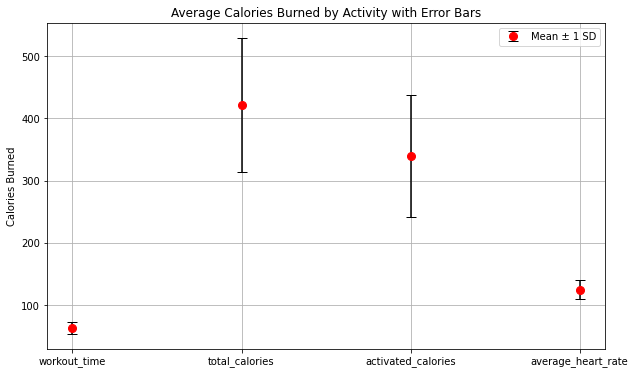

In [6]:
stats = physical.describe()
means = stats.loc['mean']
std_devs = stats.loc['std']

activities = means.index
x_pos = np.arange(len(activities))

plt.figure(figsize=(10, 6))
plt.errorbar(x_pos, means, yerr=std_devs, fmt='o', capsize=5, markersize=8, ecolor='black', color='red', label='Mean ± 1 SD')
plt.xticks(x_pos, activities)
plt.ylabel('Calories Burned')
plt.title('Average Calories Burned by Activity with Error Bars')
plt.grid()
plt.legend()
plt.show()

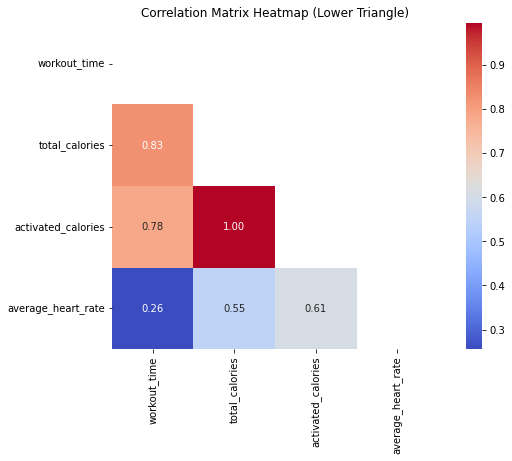

In [7]:
# TODO: correlation matrix
corr = physical.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, ax=ax)
plt.title('Correlation Matrix Heatmap (Lower Triangle)')
plt.show()

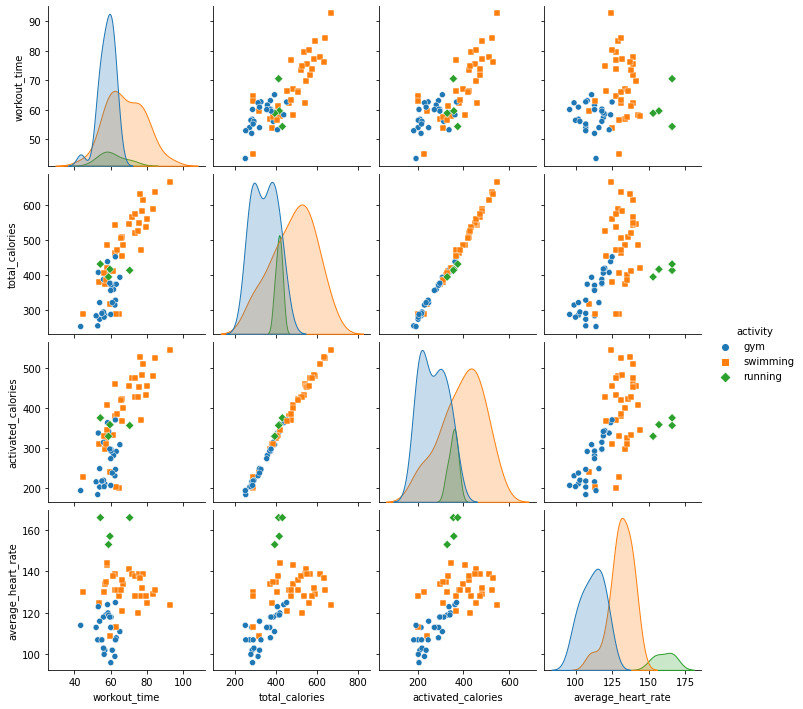

In [8]:
# TODO: Pairplot distribution
sns.pairplot(physical, hue="activity", markers=["o", "s", "D"])

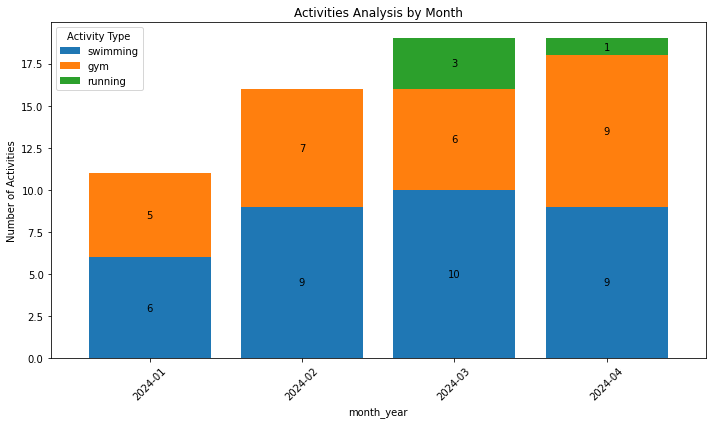

In [9]:
# TODO: Creating the bar plot for quantity activities by type and line plot for total activities, both by month
physical['month_year'] = physical['date'].dt.to_period('M')
activity_counts = physical.groupby(['month_year', 'activity']).size().unstack(fill_value=0)
activity_counts = activity_counts[['swimming', 'gym', 'running']]
total_activities = physical.groupby('month_year').size()

fig, ax1 = plt.subplots(figsize=(10, 6))
bar = activity_counts.plot(kind='bar', stacked=True, ax=ax1, width=0.8)
ax1.set_ylabel('Number of Activities')
ax1.set_title('Activities Analysis by Month')
ax1.legend(title='Activity Type')
ax1.set_xticklabels([str(x) for x in activity_counts.index], rotation=45)

for container in bar.containers:
    labels = [f'{v.get_height():.0f}' if v.get_height() != 0 else '' for v in container]
    ax1.bar_label(container, labels=labels, label_type='center')

plt.tight_layout()
plt.show()

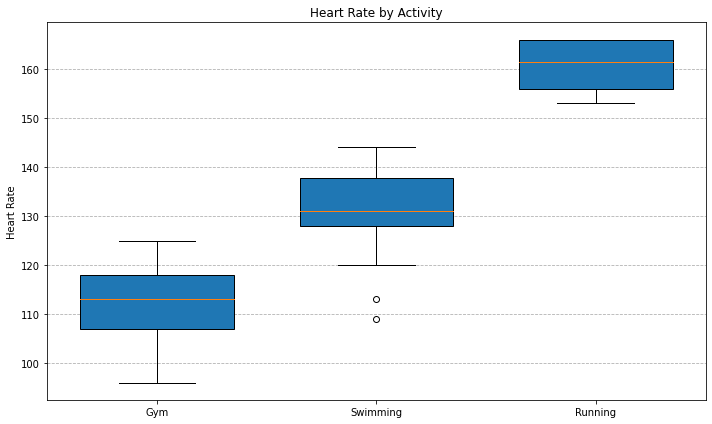

In [10]:
# TODO: Creating the box plot for average heart by activity
gym = physical.loc[physical['activity'] == 'gym', 'average_heart_rate']
swimming = physical.loc[physical['activity'] == 'swimming', 'average_heart_rate']
running = physical.loc[physical['activity'] == 'running', 'average_heart_rate']

fig, ax = plt.subplots(figsize=(10, 6))
bplot1 = ax.boxplot(gym, positions=[1], patch_artist=True, widths=0.7)
bplot2 = ax.boxplot(swimming, positions=[2], patch_artist=True, widths=0.7)
bplot3 = ax.boxplot(running, positions=[3], patch_artist=True, widths=0.7)

ax.set_xticklabels(['Gym', 'Swimming', 'Running'])
plt.title('Heart Rate by Activity')
plt.ylabel('Heart Rate')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

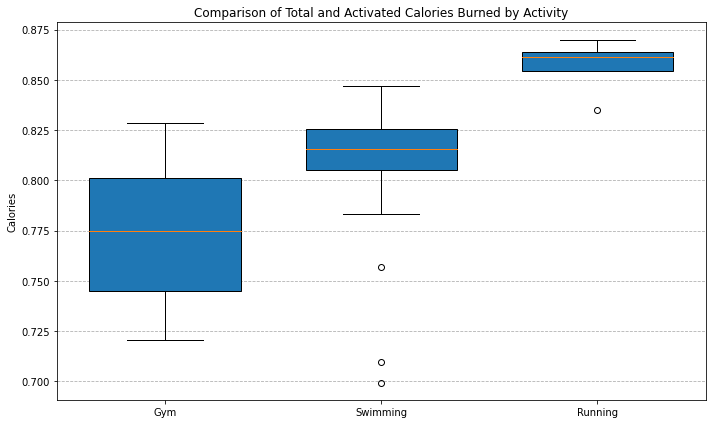

In [11]:
# TODO: Compare total_calories and activated_calories by activity
physical['calories_compared'] = physical['activated_calories']/physical['total_calories']
gym = physical.loc[physical['activity'] == 'gym', 'calories_compared']
swimming = physical.loc[physical['activity'] == 'swimming', 'calories_compared']
running = physical.loc[physical['activity'] == 'running', 'calories_compared']

fig, ax = plt.subplots(figsize=(10, 6))
bplot1 = ax.boxplot(gym, positions=[1], patch_artist=True, widths=0.7)
bplot2 = ax.boxplot(swimming, positions=[2], patch_artist=True, widths=0.7)
bplot3 = ax.boxplot(running, positions=[3], patch_artist=True, widths=0.7)

ax.set_xticklabels(['Gym', 'Swimming', 'Running'])
plt.title('Comparison of Total and Activated Calories Burned by Activity')
plt.ylabel('Calories')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

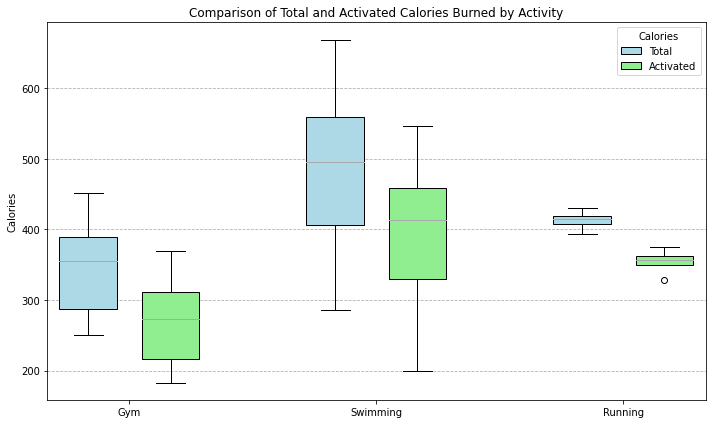

In [12]:
# TODO: Creating the box plot for total/active calories burned by activity
gym = physical.loc[physical['activity'] == 'gym', ['total_calories', 'activated_calories']]
swimming = physical.loc[physical['activity'] == 'swimming', ['total_calories', 'activated_calories']]
running = physical.loc[physical['activity'] == 'running', ['total_calories', 'activated_calories']]

# The positions for the groups
positions_gym = [1, 2]
positions_swimming = [4, 5]
positions_running = [7, 8]

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
bplot1 = ax.boxplot(gym, positions=positions_gym, patch_artist=True, widths=0.7, labels=['Total', 'Activated'])
bplot2 = ax.boxplot(swimming, positions=positions_swimming, patch_artist=True, widths=0.7, labels=['Total', 'Activated'])
bplot3 = ax.boxplot(running, positions=positions_running, patch_artist=True, widths=0.7, labels=['Total', 'Activated'])

# Setting colors for each activity
colors = ['#add8e6', '#90ee90']
median_color = 'darkgrey'
for bplot in (bplot1, bplot2, bplot3):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    for median in bplot['medians']:
        median.set_color(median_color)

# Adding activity labels in the middle of each group
ax.set_xticks([1.5, 4.5, 7.5])
ax.set_xticklabels(['Gym', 'Swimming', 'Running'])
ax.legend([bplot1["boxes"][0], bplot1["boxes"][1]], ['Total', 'Activated'], loc='upper right', title='Calories')

plt.title('Comparison of Total and Activated Calories Burned by Activity')
plt.ylabel('Calories')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

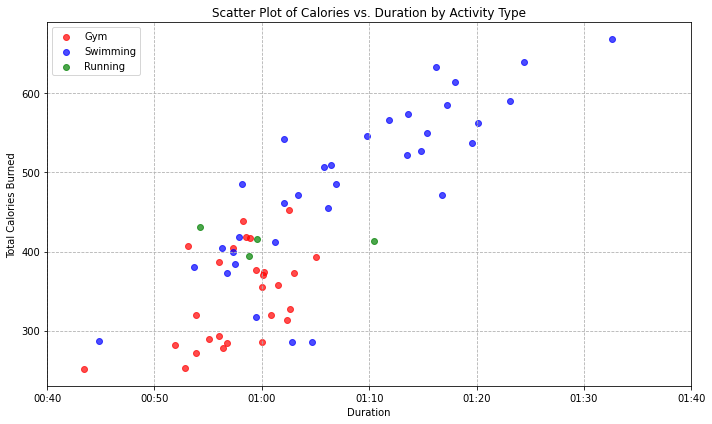

In [13]:
# TODO: Creating the scatter plot calories vs time by activities type
gym = physical.loc[physical['activity'] == 'gym', :]
swimming = physical.loc[physical['activity'] == 'swimming', :]
running = physical.loc[physical['activity'] == 'running', :]

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(gym['workout_time'], gym['total_calories'], color='red', label='Gym', alpha=0.7)
ax.scatter(swimming['workout_time'], swimming['total_calories'], color='blue', label='Swimming', alpha=0.7)
ax.scatter(running['workout_time'], running['total_calories'], color='green', label='Running', alpha=0.7)

xticks = plt.xticks()[0]  # Get current ticks
new_labels = [f'{int(x//60):02d}:{int(x%60):02d}' for x in xticks]  # Format to HH:MM
plt.xticks(xticks, new_labels)  # Set new labels

plt.xlabel('Duration')
plt.ylabel('Total Calories Burned')
plt.title('Scatter Plot of Calories vs. Duration by Activity Type')
plt.grid(linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()